## 1. BUSINESS UNDERSTANDING

### Problem Statement
Housing and real estate market is increasing so as the competition in the market.Its not easy to predict the changing trend in house sales and purchases. Companies in this sector face problems such as:

1. What are the important variables to predict the price of houses?
2. How the price of house are described by these variables?

## 2. DATA UNDERSTANDING

In [407]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [408]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.feature_selection import RFE

In [409]:
df=pd.read_csv('train.csv')
df.head(4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000


In [410]:
df.shape

(1168, 81)

In [411]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [412]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [413]:
df.isnull().sum().sort_values()[-10:]

GarageFinish      64
GarageYrBlt       64
GarageCond        64
GarageType        64
LotFrontage      214
FireplaceQu      551
Fence            931
Alley           1091
MiscFeature     1124
PoolQC          1161
dtype: int64

In [414]:
df["PoolQC"].unique()

array([nan, 'Ex', 'Gd', 'Fa'], dtype=object)

In [415]:
df["PoolQC"].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [416]:
df["PoolArea"].isnull().sum()

0

In [417]:
df["PoolArea"].value_counts()

0      1161
555       1
576       1
738       1
519       1
480       1
648       1
512       1
Name: PoolArea, dtype: int64

In [418]:
df["PoolArea"]==0

0       True
1       True
2       True
3       True
4       True
        ... 
1163    True
1164    True
1165    True
1166    True
1167    True
Name: PoolArea, Length: 1168, dtype: bool

In [419]:
df.loc[df["PoolArea"]==0,["PoolQC"]].count()

PoolQC    0
dtype: int64

In [420]:
#filling the null value in PoolQC with NA
df['PoolQC'].fillna("NA")

0       NA
1       NA
2       NA
3       NA
4       NA
        ..
1163    NA
1164    NA
1165    NA
1166    NA
1167    NA
Name: PoolQC, Length: 1168, dtype: object

In [421]:
df['PoolQC']=df['PoolQC'].fillna("NA")

In [422]:
df["PoolQC"]

0       NA
1       NA
2       NA
3       NA
4       NA
        ..
1163    NA
1164    NA
1165    NA
1166    NA
1167    NA
Name: PoolQC, Length: 1168, dtype: object

In [423]:
df["FireplaceQu"].unique()

array(['TA', 'Gd', nan, 'Fa', 'Ex', 'Po'], dtype=object)

In [424]:
df["FireplaceQu"].value_counts()

Gd    301
TA    252
Fa     25
Ex     21
Po     18
Name: FireplaceQu, dtype: int64

In [425]:
df["Fireplaces"].isnull().sum()

0

In [426]:
df["Fireplaces"]==0

0       False
1       False
2       False
3       False
4       False
        ...  
1163     True
1164     True
1165    False
1166     True
1167    False
Name: Fireplaces, Length: 1168, dtype: bool

In [427]:
df["Fireplaces"].value_counts()

0    551
1    518
2     94
3      5
Name: Fireplaces, dtype: int64

In [428]:
df.loc[df["Fireplaces"]==0,["FireplaceQu"]].count()

FireplaceQu    0
dtype: int64

In [429]:
df.loc[(df["Fireplaces"]==0) & (df["FireplaceQu"].notnull()),:]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [430]:
df['FireplaceQu']=df['FireplaceQu'].fillna("NA")

In [431]:
df['FireplaceQu']

0       TA
1       TA
2       TA
3       TA
4       TA
        ..
1163    NA
1164    NA
1165    TA
1166    NA
1167    Gd
Name: FireplaceQu, Length: 1168, dtype: object

In [432]:
#Dropping the column which has lot of null values
df.drop(columns=['Fence','Alley','MiscFeature'],inplace=True)

### Univariate Analysis

In [433]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [434]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   LotShape       1168 non-null   object 
 7   LandContour    1168 non-null   object 
 8   Utilities      1168 non-null   object 
 9   LotConfig      1168 non-null   object 
 10  LandSlope      1168 non-null   object 
 11  Neighborhood   1168 non-null   object 
 12  Condition1     1168 non-null   object 
 13  Condition2     1168 non-null   object 
 14  BldgType       1168 non-null   object 
 15  HouseStyle     1168 non-null   object 
 16  OverallQual    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  YearBuil

In [435]:
category_cols=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','SaleType','SaleCondition'] 
numeric_cols=['MSSubClass','OverallQual','OverallCond','YearBuilt','YearRemodAdd','LotFrontage','LotArea','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','MasVnrArea','BsmtFinSF1','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','WoodDeckSF','Fireplaces','GarageCars','GarageYrBlt','MiscVal','MoSold','YrSold','GarageArea','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','SalePrice']

In [436]:
df['SalePrice']

0       128000
1       268000
2       269790
3       190000
4       215000
         ...  
1163    122000
1164    108000
1165    148500
1166     40000
1167    183200
Name: SalePrice, Length: 1168, dtype: int64

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


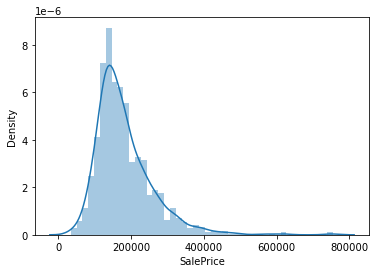

In [437]:
sns.distplot(df["SalePrice"])
plt.show()

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


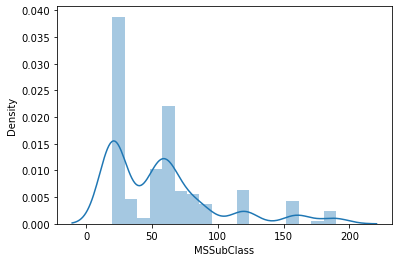

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


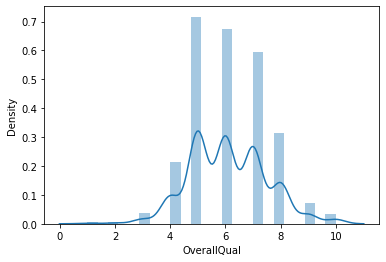

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


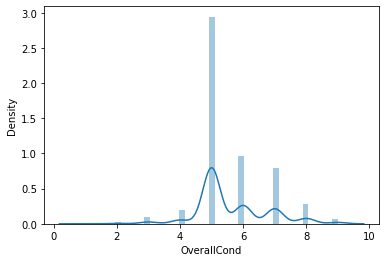

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


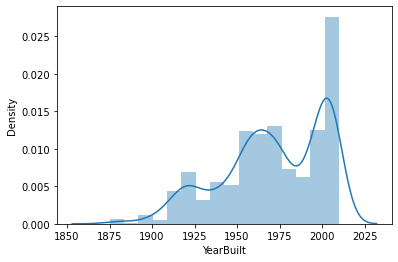

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


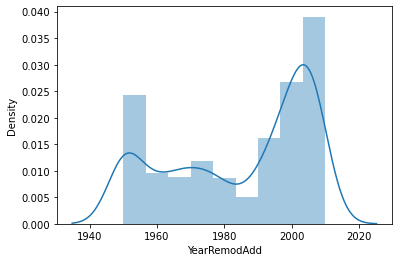

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


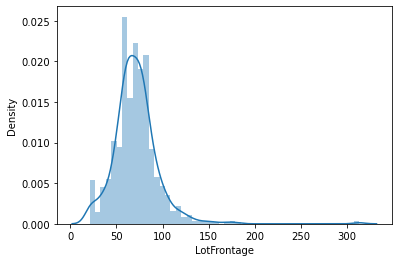

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


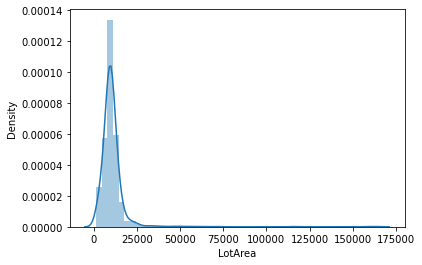

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


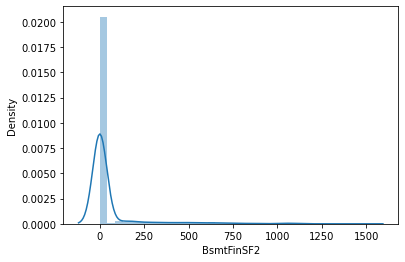

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


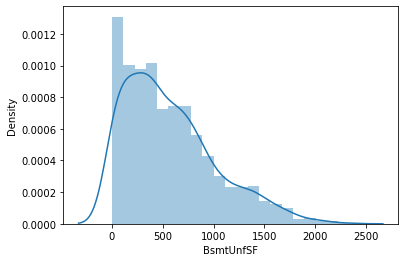

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


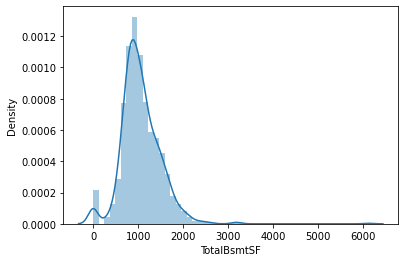

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


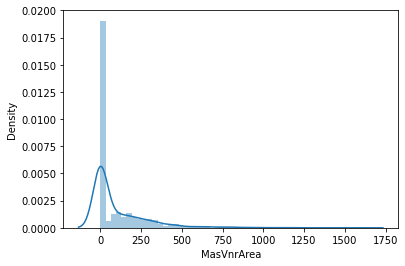

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


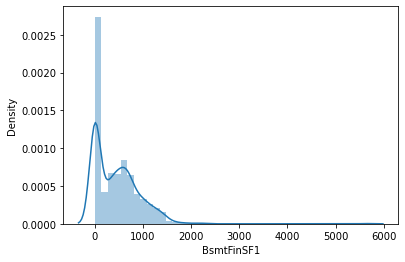

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


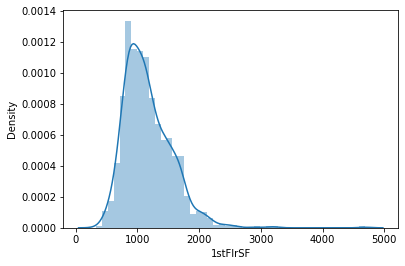

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


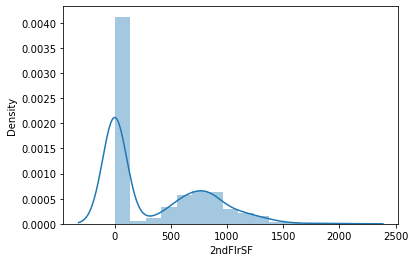

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


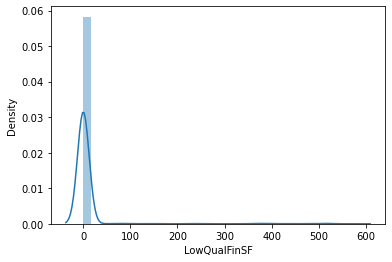

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


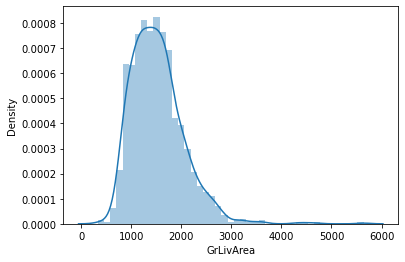

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


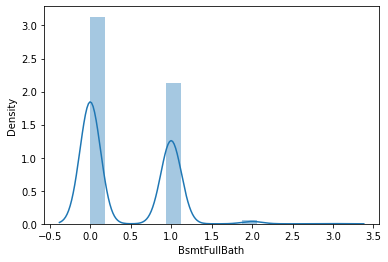

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


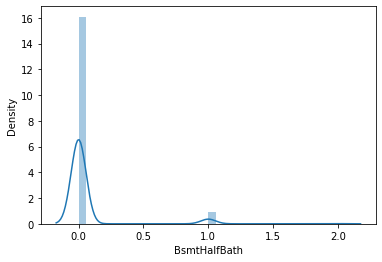

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


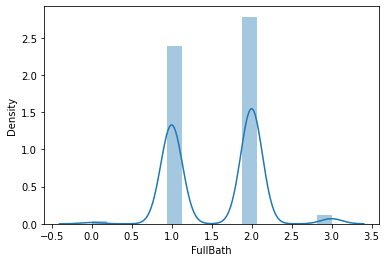

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


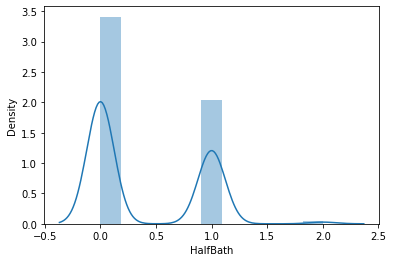

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


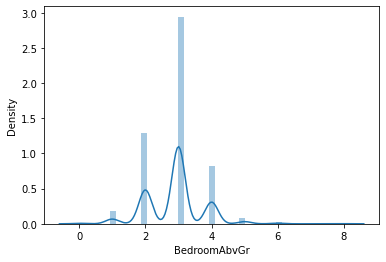

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


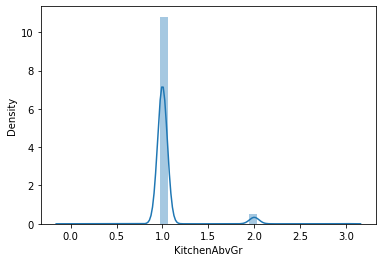

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


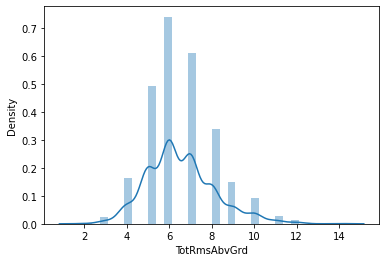

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


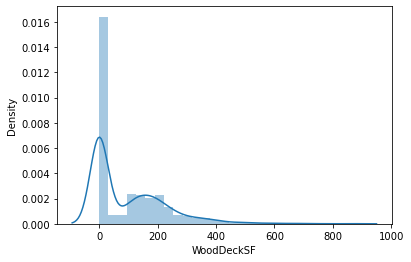

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


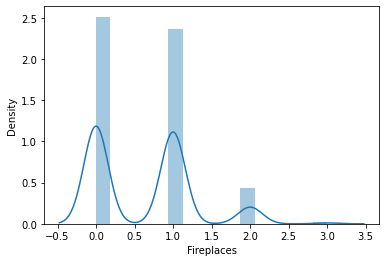

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


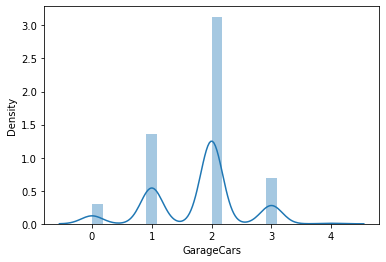

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


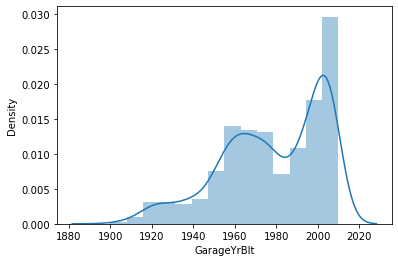

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


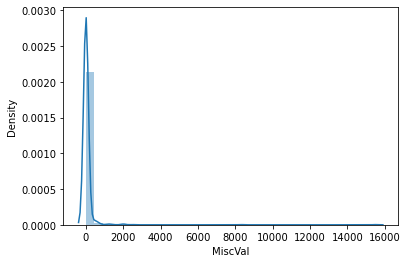

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


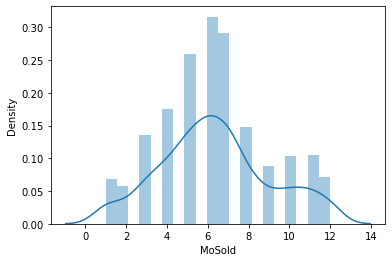

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


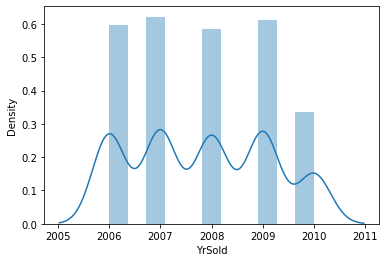

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


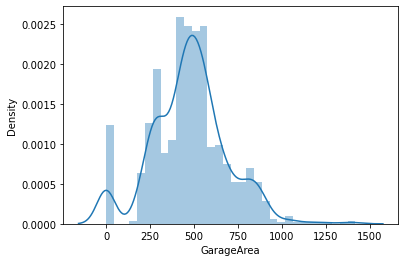

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


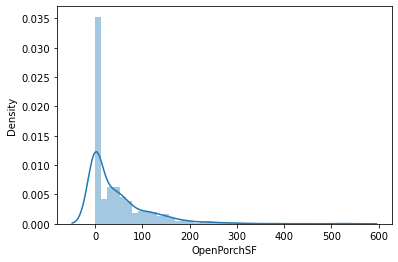

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


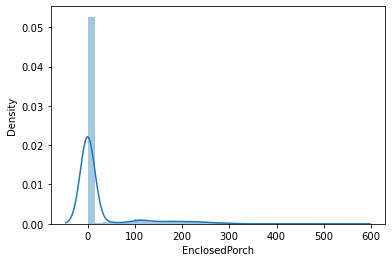

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


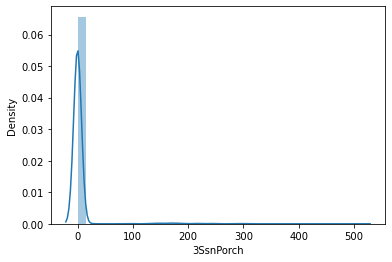

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


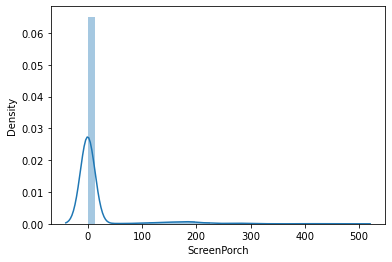

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


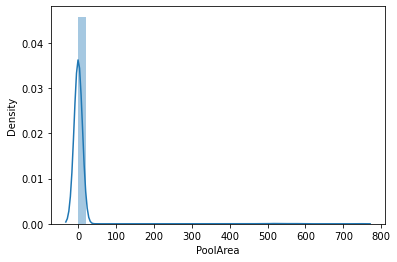

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


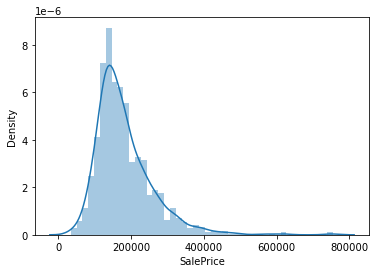

In [438]:
for i in numeric_cols:
    sns.distplot(df[i])
    plt.show()

In [439]:
df["BldgType"]

0       TwnhsE
1         1Fam
2         1Fam
3         1Fam
4         1Fam
         ...  
1163      1Fam
1164      1Fam
1165     Twnhs
1166      1Fam
1167      1Fam
Name: BldgType, Length: 1168, dtype: object

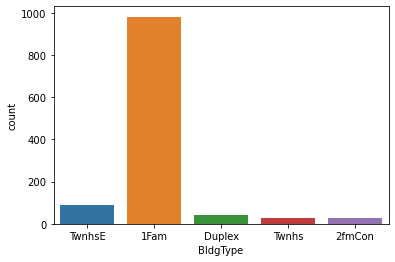

In [440]:
sns.countplot(x=df["BldgType"])
plt.show()

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


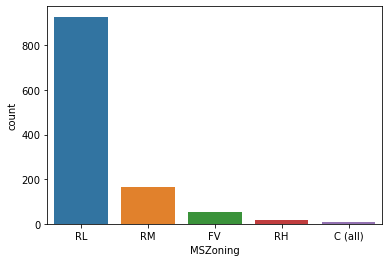

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


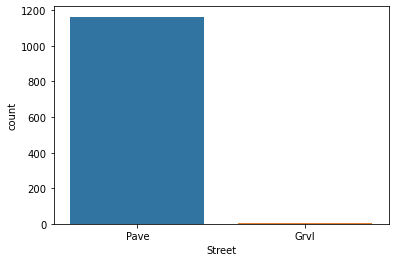

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


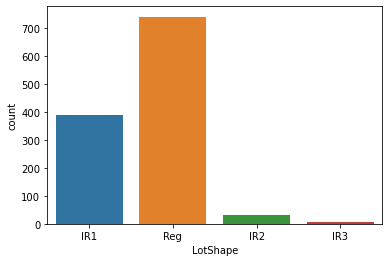

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


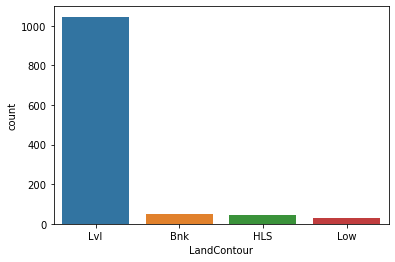

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


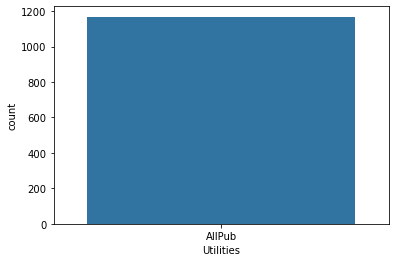

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


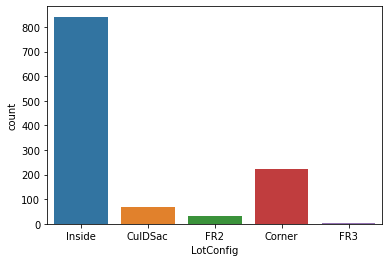

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


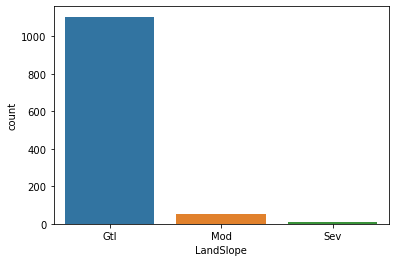

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


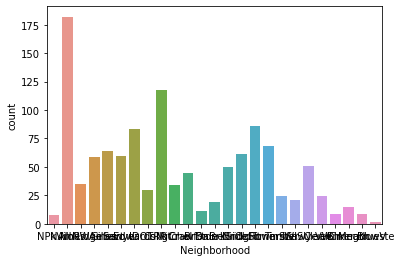

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


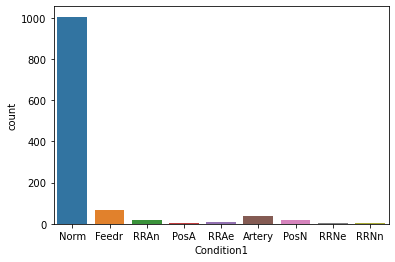

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


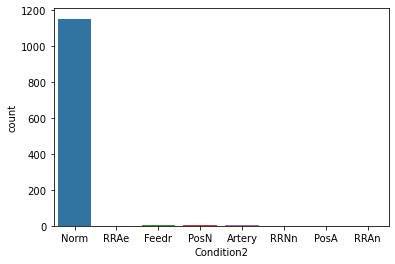

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


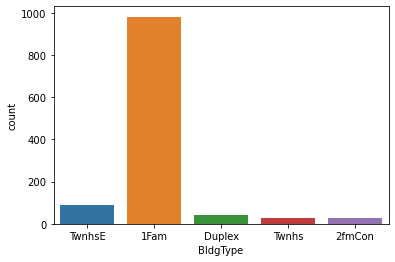

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


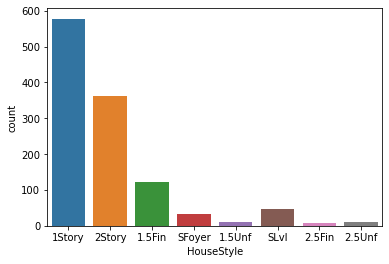

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


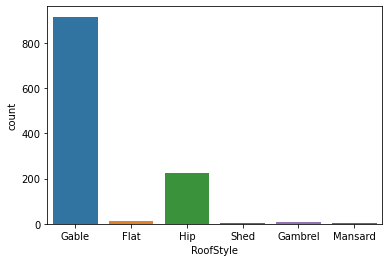

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


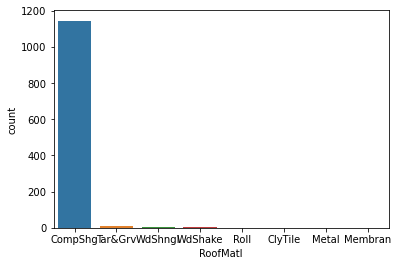

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


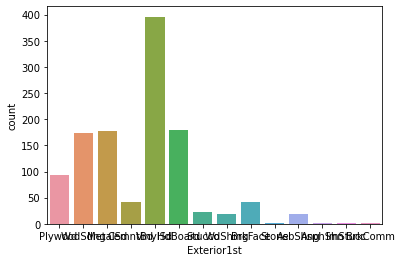

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


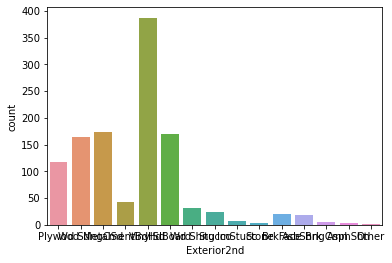

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


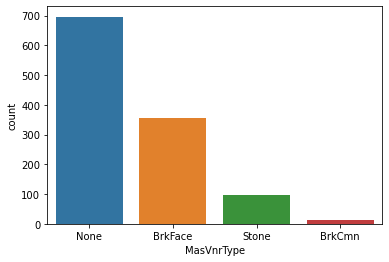

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


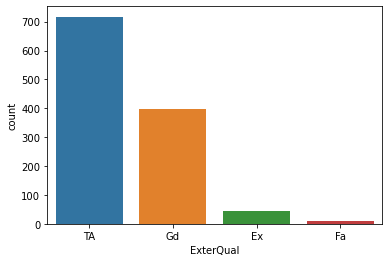

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


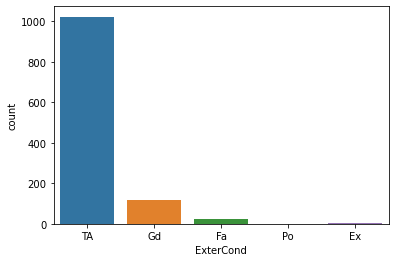

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


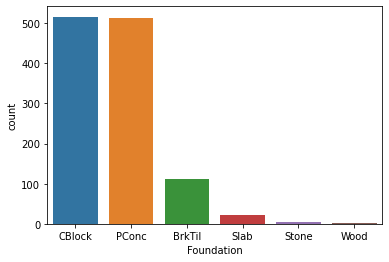

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


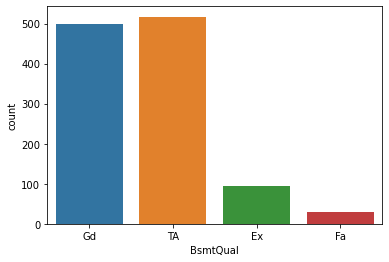

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


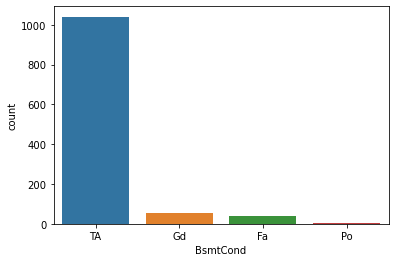

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


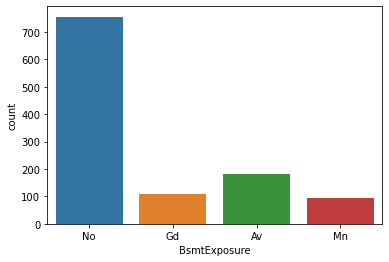

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


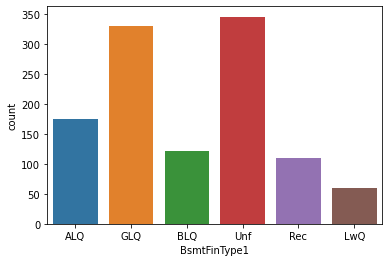

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


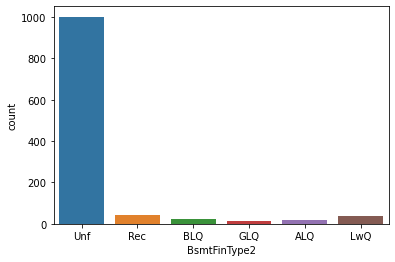

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


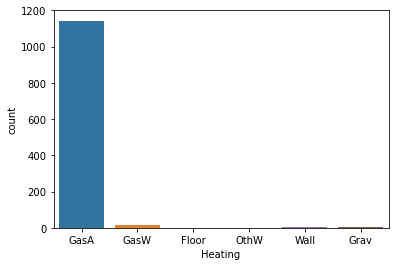

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


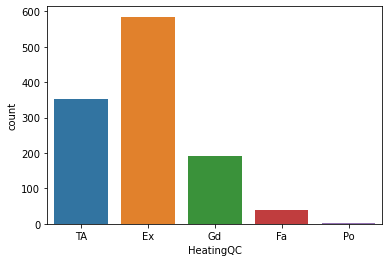

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


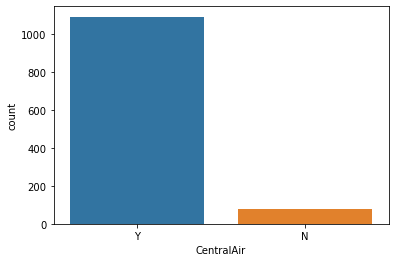

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


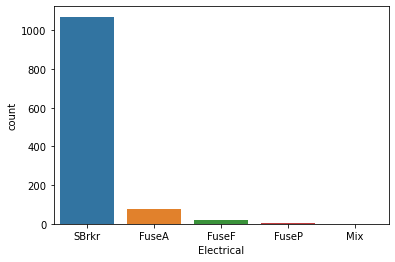

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


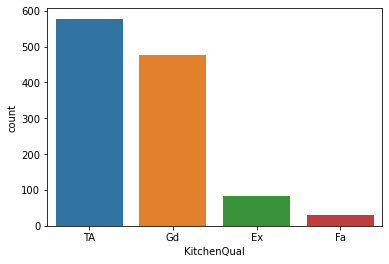

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


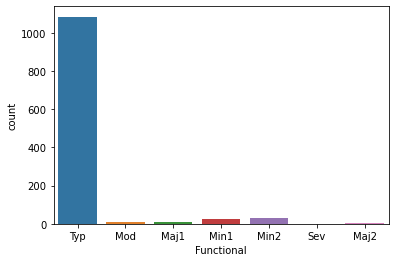

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


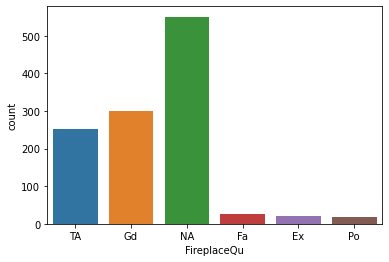

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


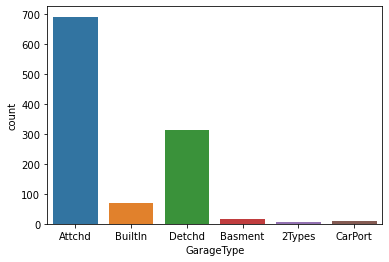

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


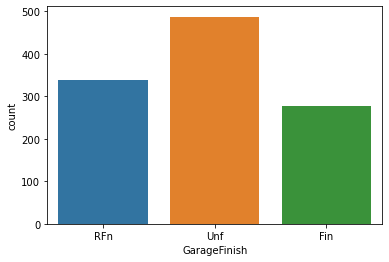

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


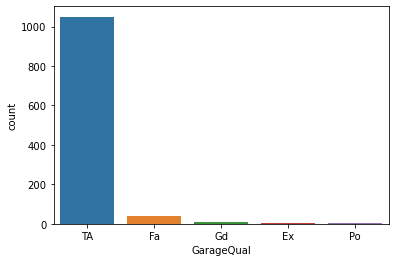

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


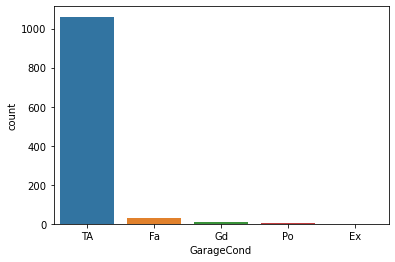

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


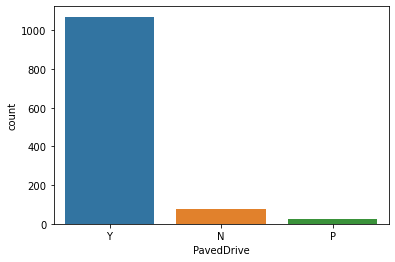

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


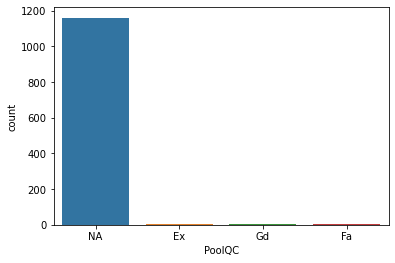

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


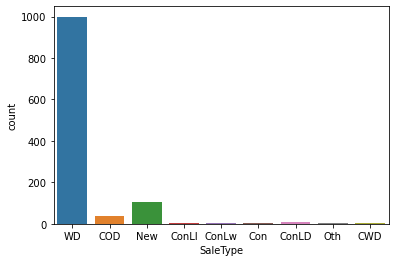

C:\Users\Rajni\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


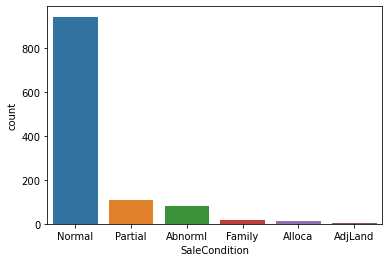

In [441]:
for i in category_cols:
    sns.countplot(df[i])
    plt.show()

In [442]:
category_cols_exc=['Street','Utilities','Neighborhood','RoofMatl','Exterior1st','Exterior2nd']

In [443]:
df['MSSubClass'].astype(str)

0       120
1        20
2        60
3        20
4        20
       ... 
1163     20
1164     20
1165    160
1166     70
1167     60
Name: MSSubClass, Length: 1168, dtype: object

In [444]:
df['MSSubClass']=df['MSSubClass'].astype(str)

In [445]:
category_cols

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'SaleType',
 'SaleCondition']

In [446]:
numeric_cols.remove('MSSubClass')

In [447]:
print(numeric_cols)

['OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'LotFrontage', 'LotArea', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'MasVnrArea', 'BsmtFinSF1', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'WoodDeckSF', 'Fireplaces', 'GarageCars', 'GarageYrBlt', 'MiscVal', 'MoSold', 'YrSold', 'GarageArea', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'SalePrice']


In [448]:
category_cols.append('MSSubClass')
print(category_cols)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'SaleType', 'SaleCondition', 'MSSubClass']


In [449]:
# exclude categorical columns which are not required
df.drop(columns=category_cols_exc,inplace=True)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Condition1,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,IR1,Lvl,Inside,Gtl,Norm,...,0,0,0,NA,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,IR1,Lvl,Inside,Mod,Norm,...,0,224,0,NA,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,IR1,Lvl,CulDSac,Gtl,Norm,...,0,0,0,NA,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,IR1,Lvl,Inside,Gtl,Norm,...,0,0,0,NA,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,IR1,Lvl,FR2,Gtl,Norm,...,0,0,0,NA,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,IR1,Lvl,Inside,Gtl,Norm,...,0,0,0,NA,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Reg,Lvl,Inside,Gtl,Feedr,...,0,0,0,NA,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Reg,Lvl,FR2,Gtl,Norm,...,0,0,0,NA,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Reg,Lvl,Inside,Gtl,Feedr,...,0,0,0,NA,0,7,2008,WD,Normal,40000


In [450]:
for i in category_cols_exc:
    category_cols.remove(i)
category_cols

['MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'SaleType',
 'SaleCondition',
 'MSSubClass']

### Bivariate Analysis

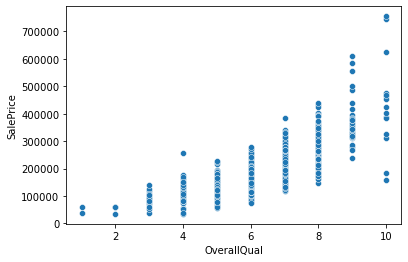

In [451]:
#sns.scatterplot(y=df["SalePrice"],x=df["OverallQual"])
sns.scatterplot(data=df,y="SalePrice",x="OverallQual")
plt.show()

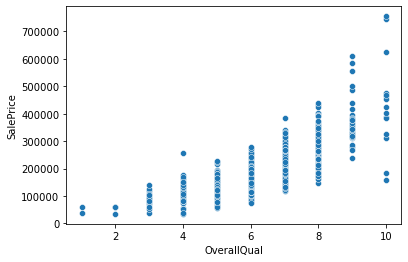

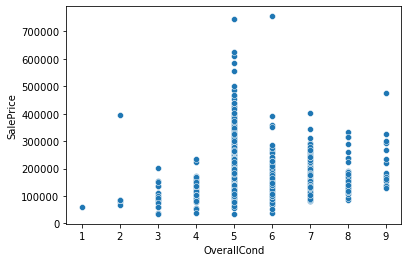

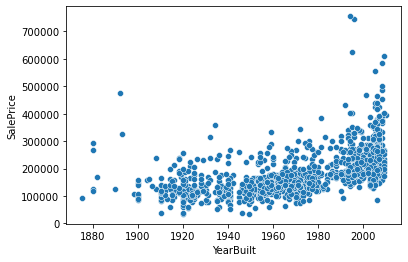

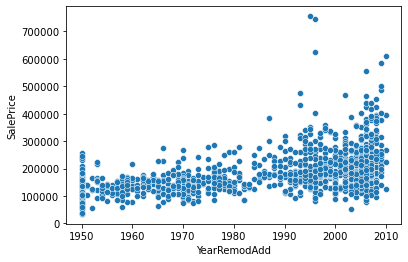

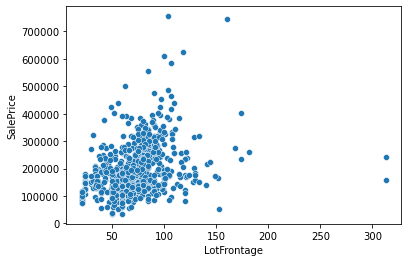

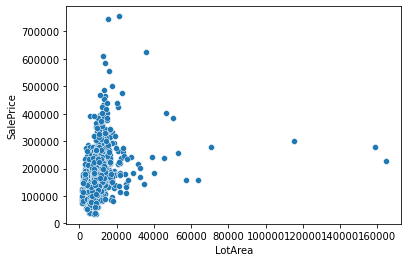

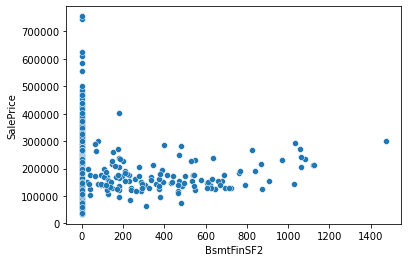

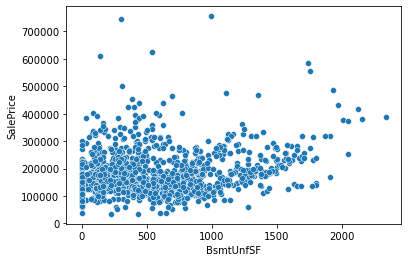

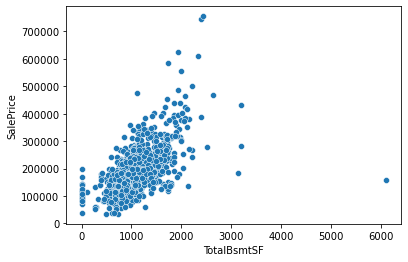

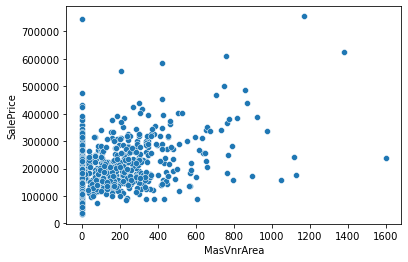

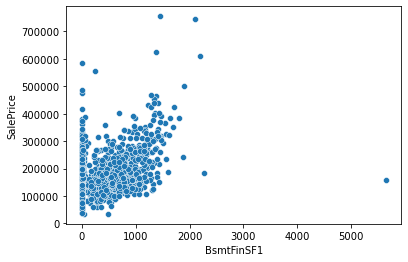

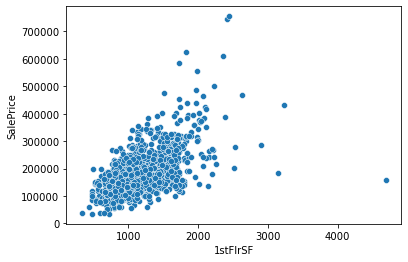

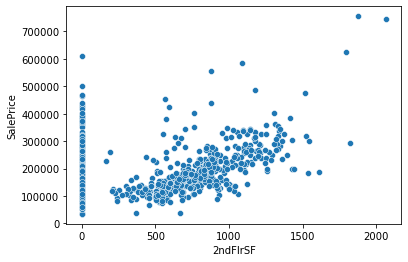

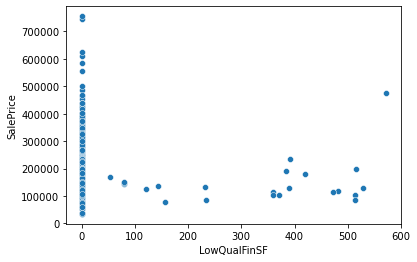

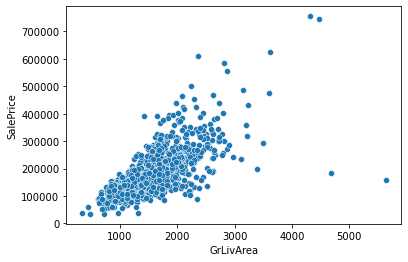

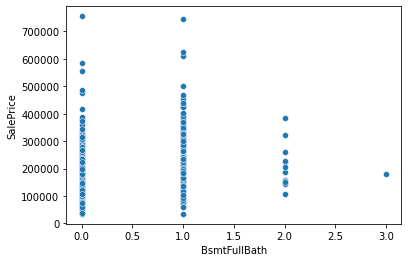

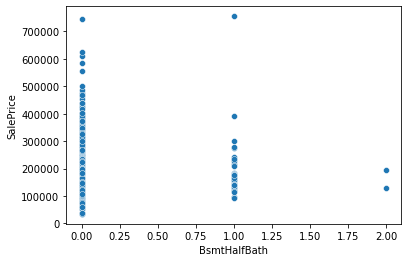

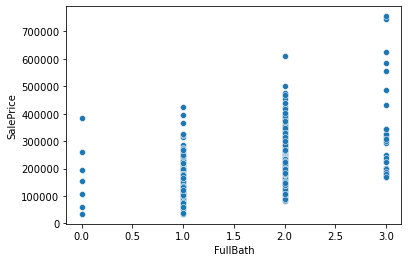

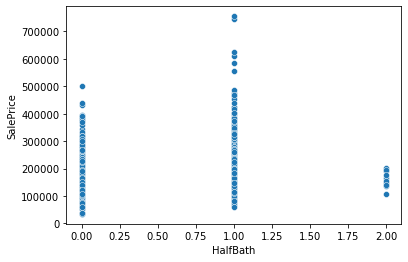

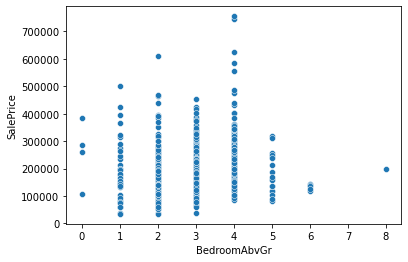

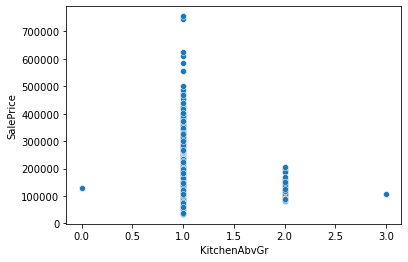

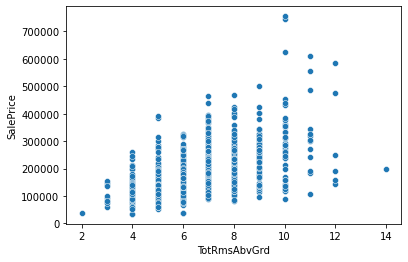

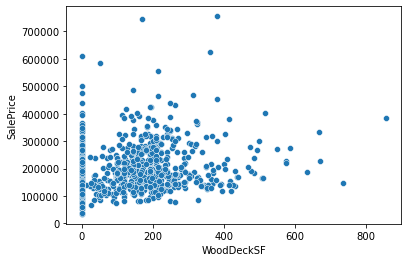

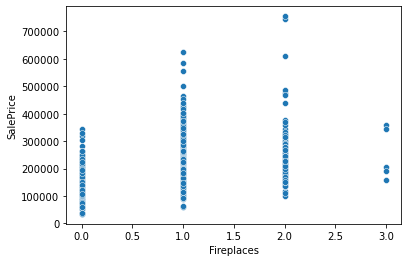

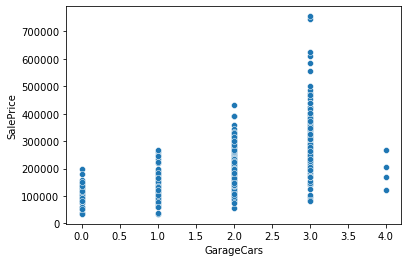

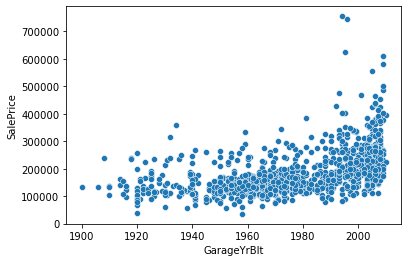

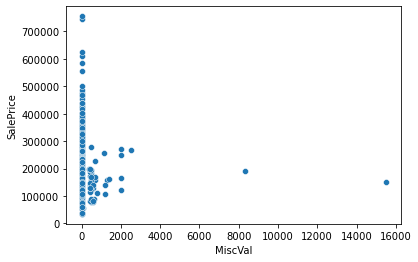

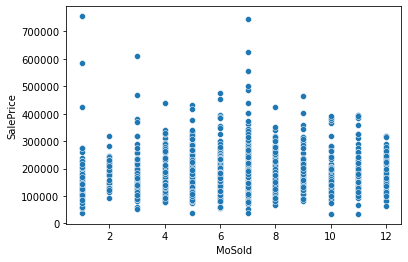

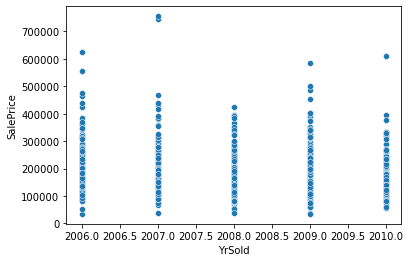

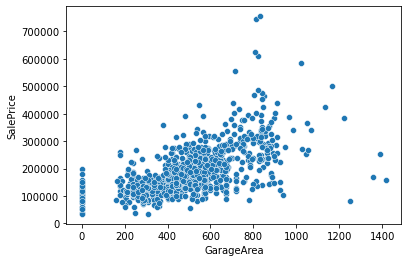

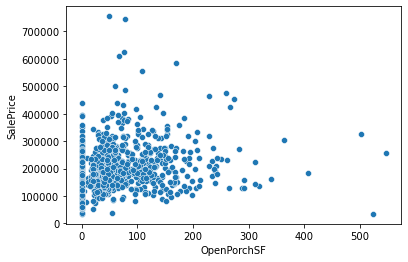

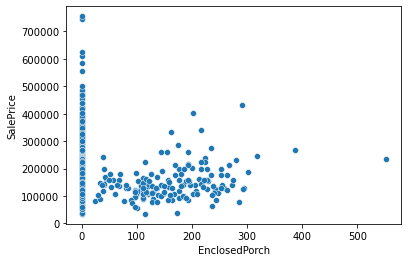

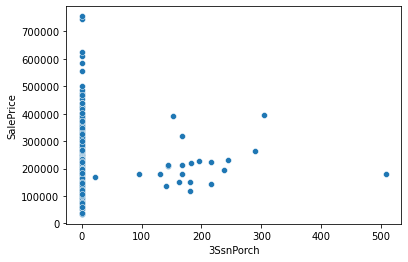

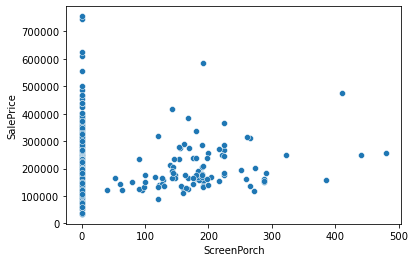

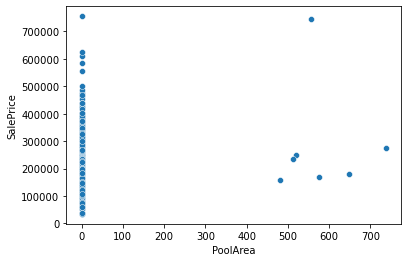

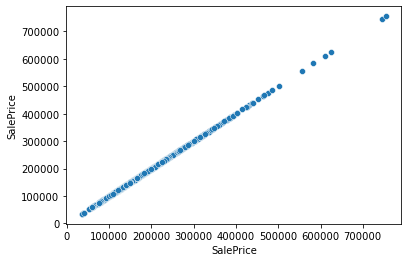

In [452]:
for i in numeric_cols:
    #sns.scatterplot(y=df["SalePrice"],x=df[i])
    sns.scatterplot(data=df,y="SalePrice",x=i)
    plt.show()

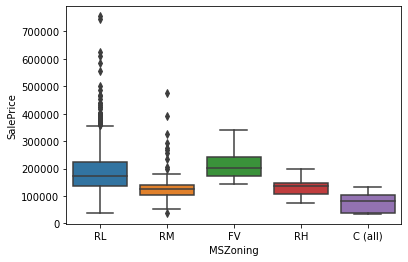

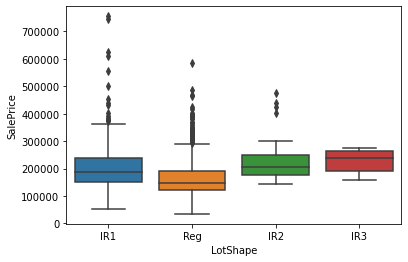

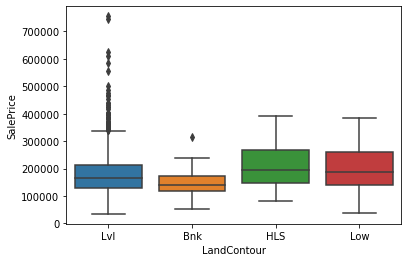

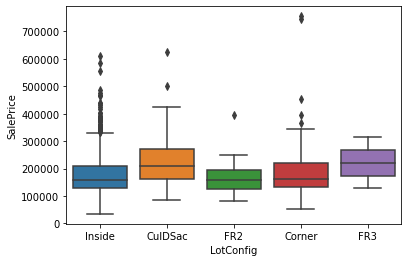

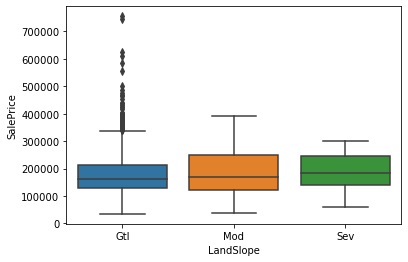

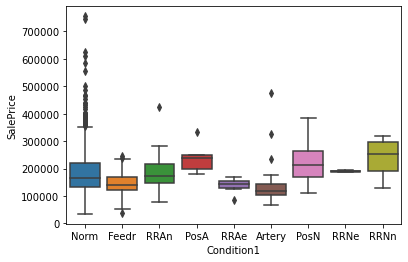

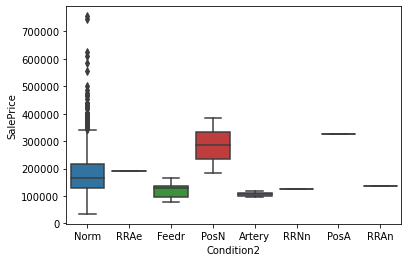

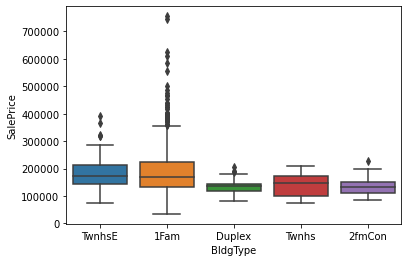

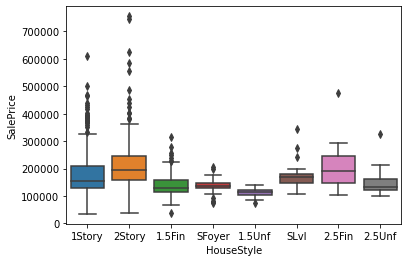

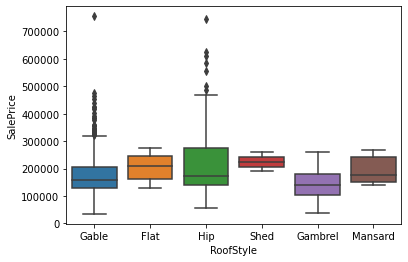

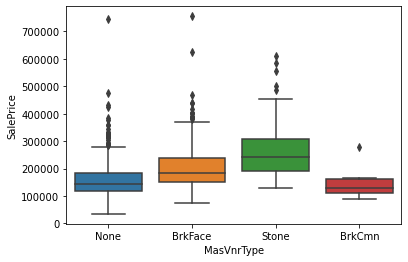

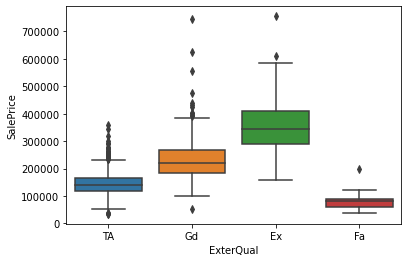

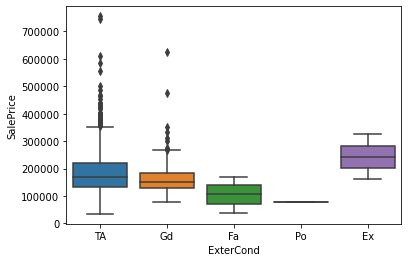

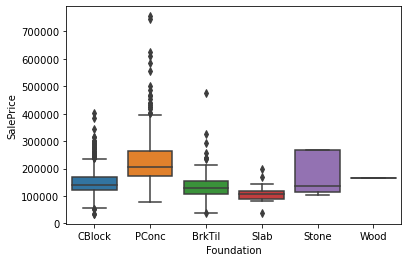

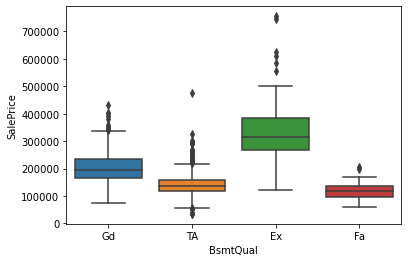

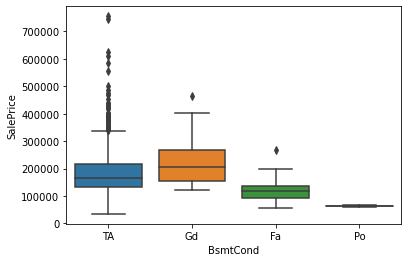

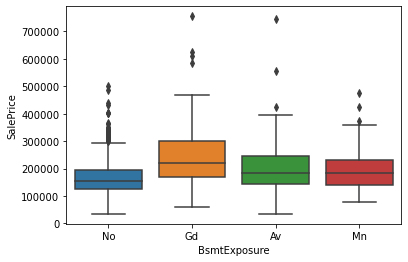

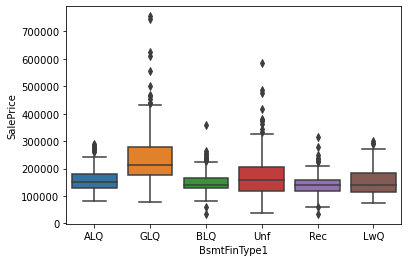

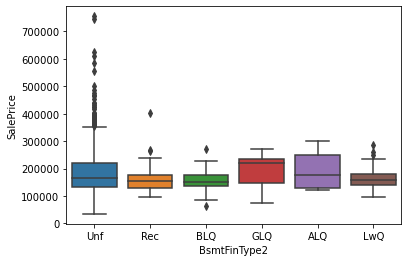

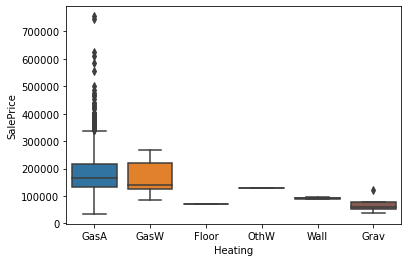

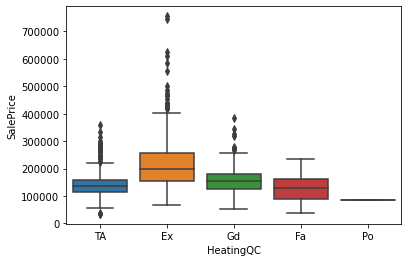

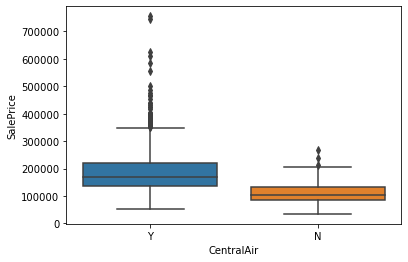

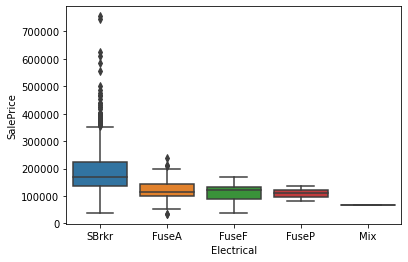

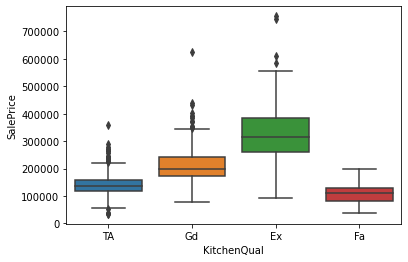

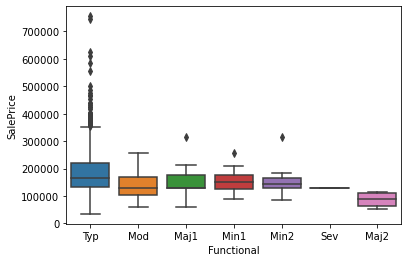

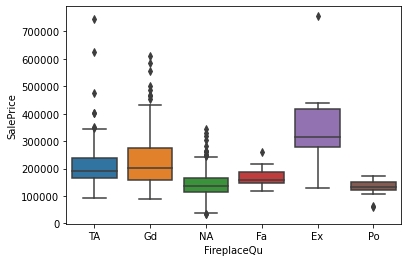

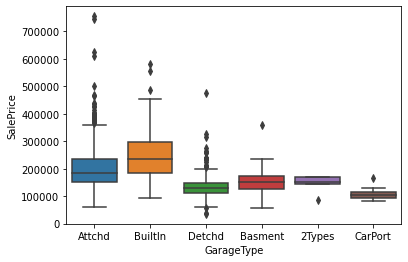

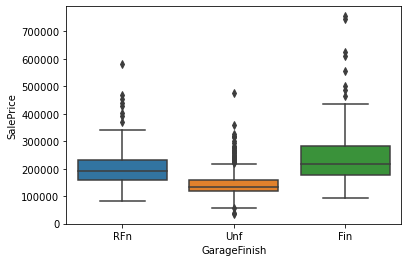

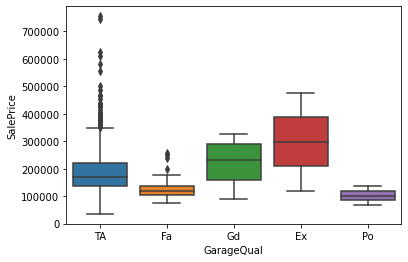

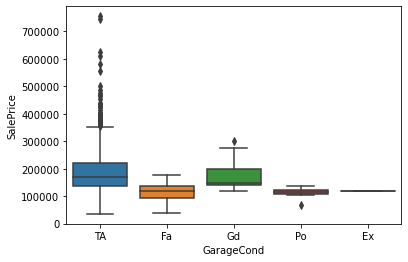

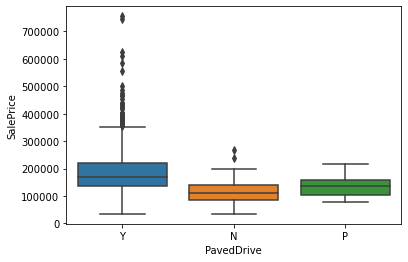

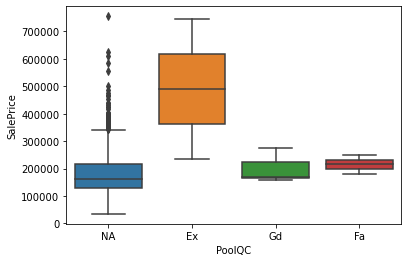

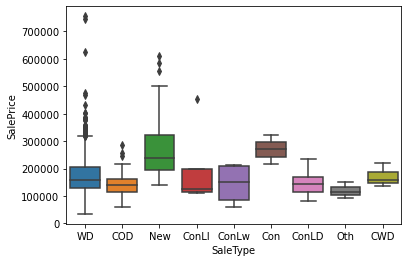

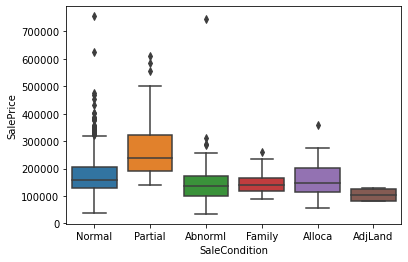

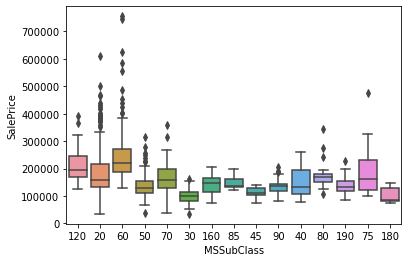

In [453]:
for i in category_cols:
    #sns.boxplot(y=df["SalePrice"],x=df[i])
    sns.boxplot(data=df,y="SalePrice",x=i)
    plt.show()

In [454]:
df.corr()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,-0.006629,-0.029212,-0.036965,0.039761,-0.016942,-0.018590,-0.060652,0.003868,0.005269,...,-0.027498,-0.013642,0.004885,-0.021773,0.005169,0.065832,0.001304,0.023479,-0.008853,-0.023897
LotFrontage,-0.006629,1.000000,0.557257,0.247809,-0.053345,0.118554,0.096050,0.202225,0.247780,0.002514,...,0.101751,0.167092,0.023118,0.059508,0.033111,0.223429,-0.004559,0.025046,-0.004296,0.341294
LotArea,-0.029212,0.557257,1.000000,0.107188,0.017513,0.005506,0.027228,0.121448,0.221851,0.056656,...,0.216720,0.093080,-0.007446,0.025794,0.025256,0.097107,0.051679,0.015141,-0.035399,0.249499
OverallQual,-0.036965,0.247809,0.107188,1.000000,-0.083167,0.575800,0.555945,0.409163,0.219643,-0.040893,...,0.227137,0.341030,-0.098374,0.045919,0.059387,0.072247,-0.025786,0.090638,-0.048759,0.789185
OverallCond,0.039761,-0.053345,0.017513,-0.083167,1.000000,-0.377731,0.080669,-0.137882,-0.028810,0.044336,...,0.012290,-0.024899,0.056074,0.040476,0.069463,-0.003603,0.075178,0.005519,0.055517,-0.065642
YearBuilt,-0.016942,0.118554,0.005506,0.575800,-0.377731,1.000000,0.592829,0.323006,0.227933,-0.027682,...,0.204830,0.191069,-0.373544,0.037079,-0.058760,0.006408,-0.030008,0.031754,-0.013976,0.514408
YearRemodAdd,-0.018590,0.096050,0.027228,0.555945,0.080669,0.592829,1.000000,0.181869,0.114430,-0.044694,...,0.197410,0.238755,-0.193574,0.064763,-0.046220,0.006874,-0.001199,0.024663,0.033265,0.507831
MasVnrArea,-0.060652,0.202225,0.121448,0.409163,-0.137882,0.323006,0.181869,1.000000,0.267066,-0.065723,...,0.151978,0.131850,-0.102321,0.018721,0.046509,0.013590,-0.027583,0.013432,-0.013493,0.466386
BsmtFinSF1,0.003868,0.247780,0.221851,0.219643,-0.028810,0.227933,0.114430,0.267066,1.000000,-0.052145,...,0.192939,0.108802,-0.082351,0.025485,0.033490,0.154769,0.008314,0.007482,0.005614,0.362874
BsmtFinSF2,0.005269,0.002514,0.056656,-0.040893,0.044336,-0.027682,-0.044694,-0.065723,-0.052145,1.000000,...,0.094690,-0.014103,0.032081,-0.031263,0.076561,0.045990,0.007915,-0.014605,0.038438,-0.010151


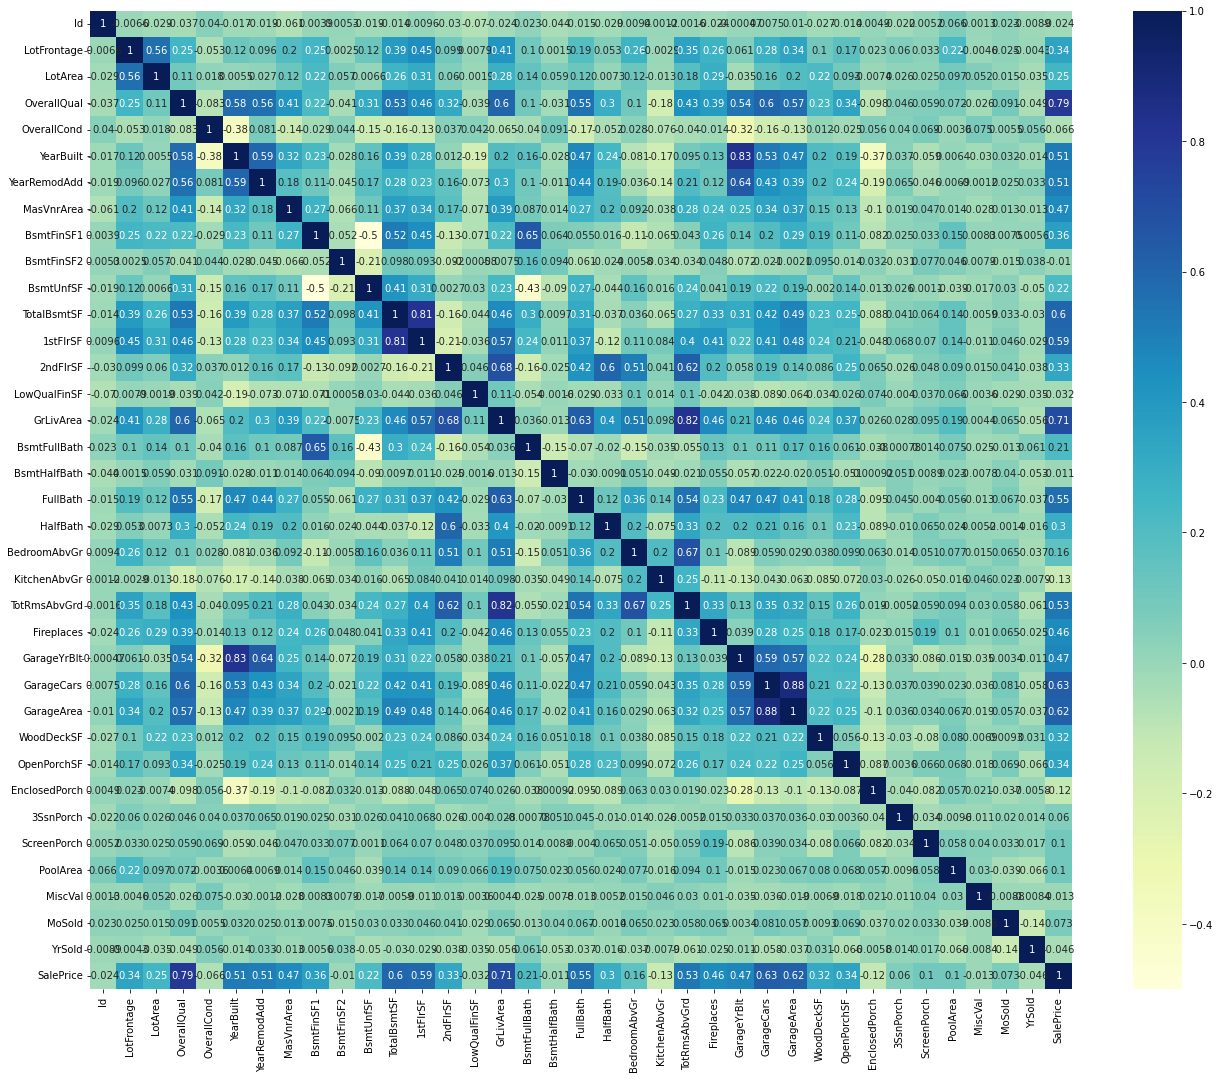

In [455]:
plt.figure(figsize=(22,18))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [456]:
# Dropping column which are very weakly correlated(<0.05) to SalePrice
numeric_column_exc=['YrSold','BsmtFinSF2','LowQualFinSF','BsmtHalfBath','3SsnPorch','MiscVal']
df.drop(columns=numeric_column_exc,inplace=True)

In [457]:
for i in numeric_column_exc:
    numeric_cols.remove(i)
numeric_cols

['OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'LotFrontage',
 'LotArea',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'MasVnrArea',
 'BsmtFinSF1',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'WoodDeckSF',
 'Fireplaces',
 'GarageCars',
 'GarageYrBlt',
 'MoSold',
 'GarageArea',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'PoolArea',
 'SalePrice']

In [458]:
df.isnull().sum().sort_values()[-10:]

BsmtCond         30
BsmtFinType1     30
BsmtFinType2     31
BsmtExposure     31
GarageQual       64
GarageFinish     64
GarageYrBlt      64
GarageCond       64
GarageType       64
LotFrontage     214
dtype: int64

In [459]:
# Filling nan with 0
df["LotFrontage"]=df["LotFrontage"].fillna(0)

In [460]:
df.loc[df["GarageQual"].isna(),['GarageQual','GarageFinish','GarageYrBlt','GarageCond','GarageType']]

,GarageQual,GarageFinish,GarageYrBlt,GarageCond,GarageType
48,NaN,NaN,NaN,NaN,NaN
72,NaN,NaN,NaN,NaN,NaN
74,NaN,NaN,NaN,NaN,NaN
105,NaN,NaN,NaN,NaN,NaN
116,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1117,NaN,NaN,NaN,NaN,NaN
1139,NaN,NaN,NaN,NaN,NaN
1145,NaN,NaN,NaN,NaN,NaN
1149,NaN,NaN,NaN,NaN,NaN


In [461]:
df[['GarageQual','GarageFinish','GarageYrBlt','GarageCond','GarageType']]

,GarageQual,GarageFinish,GarageYrBlt,GarageCond,GarageType
0,TA,RFn,1977.0,TA,Attchd
1,TA,Unf,1970.0,TA,Attchd
2,TA,Unf,1997.0,TA,Attchd
3,TA,RFn,1977.0,TA,Attchd
4,TA,Fin,1977.0,TA,Attchd
...,...,...,...,...,...
1163,TA,Unf,1970.0,TA,Detchd
1164,TA,Fin,2002.0,TA,Detchd
1165,TA,Unf,1976.0,TA,Attchd
1166,TA,Unf,1920.0,Fa,Detchd


In [462]:
df[['GarageQual','GarageFinish','GarageCond','GarageType']]=df[['GarageQual','GarageFinish','GarageCond','GarageType']].fillna('NA')

In [463]:
df["GarageYrBlt"]=df["GarageYrBlt"].fillna(0)

In [464]:
df.isnull().sum().sort_values()[-10:]

TotalBsmtSF      0
YearRemodAdd     0
SalePrice        0
MasVnrType       7
MasVnrArea       7
BsmtQual        30
BsmtCond        30
BsmtFinType1    30
BsmtExposure    31
BsmtFinType2    31
dtype: int64

In [465]:
df[['BsmtQual','BsmtCond','BsmtFinType1','BsmtExposure','BsmtFinType2' ]]=df[['BsmtQual','BsmtCond','BsmtFinType1','BsmtExposure','BsmtFinType2' ]].fillna('NA')

In [466]:
df[['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea
0,None,0.0
1,None,0.0
2,None,0.0
3,BrkFace,480.0
4,Stone,126.0
...,...,...
1163,BrkFace,31.0
1164,None,0.0
1165,None,0.0
1166,None,0.0


In [467]:
df['MasVnrType']=df['MasVnrType'].fillna('NA')

In [468]:
df['MasVnrArea']=df['MasVnrArea'].fillna(0)

In [469]:
df.isnull().sum().sort_values()[-10:]

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtUnfSF       0
TotalBsmtSF     0
YearRemodAdd    0
SalePrice       0
dtype: int64

## 3. DATA PREPARATION

#### Categorical columns to Numeric using OHE

In [470]:
df_temp=pd.get_dummies(df['MasVnrType'],prefix='MasVnrType')
pd.concat([df,df_temp],axis=1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Condition1,...,PoolQC,MoSold,SaleType,SaleCondition,SalePrice,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_None,MasVnrType_Stone
0,127,120,RL,0.0,4928,IR1,Lvl,Inside,Gtl,Norm,...,NA,2,WD,Normal,128000,0,0,0,1,0
1,889,20,RL,95.0,15865,IR1,Lvl,Inside,Mod,Norm,...,NA,10,WD,Normal,268000,0,0,0,1,0
2,793,60,RL,92.0,9920,IR1,Lvl,CulDSac,Gtl,Norm,...,NA,6,WD,Normal,269790,0,0,0,1,0
3,110,20,RL,105.0,11751,IR1,Lvl,Inside,Gtl,Norm,...,NA,1,COD,Normal,190000,0,1,0,0,0
4,422,20,RL,0.0,16635,IR1,Lvl,FR2,Gtl,Norm,...,NA,6,WD,Normal,215000,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,0.0,9819,IR1,Lvl,Inside,Gtl,Norm,...,NA,2,WD,Normal,122000,0,1,0,0,0
1164,554,20,RL,67.0,8777,Reg,Lvl,Inside,Gtl,Feedr,...,NA,5,WD,Normal,108000,0,0,0,1,0
1165,196,160,RL,24.0,2280,Reg,Lvl,FR2,Gtl,Norm,...,NA,7,WD,Normal,148500,0,0,0,1,0
1166,31,70,C (all),50.0,8500,Reg,Lvl,Inside,Gtl,Feedr,...,NA,7,WD,Normal,40000,0,0,0,1,0


In [471]:
for i in category_cols:
    df_temp=pd.get_dummies(df[i],prefix=i)
    df=pd.concat([df,df_temp],axis=1)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Condition1,...,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90
0,127,120,RL,0.0,4928,IR1,Lvl,Inside,Gtl,Norm,...,0,0,0,0,0,0,0,0,0,0
1,889,20,RL,95.0,15865,IR1,Lvl,Inside,Mod,Norm,...,0,0,0,0,0,0,0,0,0,0
2,793,60,RL,92.0,9920,IR1,Lvl,CulDSac,Gtl,Norm,...,0,0,0,0,1,0,0,0,0,0
3,110,20,RL,105.0,11751,IR1,Lvl,Inside,Gtl,Norm,...,0,0,0,0,0,0,0,0,0,0
4,422,20,RL,0.0,16635,IR1,Lvl,FR2,Gtl,Norm,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,0.0,9819,IR1,Lvl,Inside,Gtl,Norm,...,0,0,0,0,0,0,0,0,0,0
1164,554,20,RL,67.0,8777,Reg,Lvl,Inside,Gtl,Feedr,...,0,0,0,0,0,0,0,0,0,0
1165,196,160,RL,24.0,2280,Reg,Lvl,FR2,Gtl,Norm,...,0,0,0,0,0,0,0,0,0,0
1166,31,70,C (all),50.0,8500,Reg,Lvl,Inside,Gtl,Feedr,...,0,0,0,0,0,1,0,0,0,0


In [472]:
df.drop(columns=category_cols+['Id'],inplace=True)
df

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90
0,0.0,4928,6,5,1976,1976,0.0,120,958,1078,...,0,0,0,0,0,0,0,0,0,0
1,95.0,15865,8,6,1970,1970,0.0,351,1043,2217,...,0,0,0,0,0,0,0,0,0,0
2,92.0,9920,7,5,1996,1997,0.0,862,255,1117,...,0,0,0,0,1,0,0,0,0,0
3,105.0,11751,6,6,1977,1977,480.0,705,1139,1844,...,0,0,0,0,0,0,0,0,0,0
4,0.0,16635,6,7,1977,2000,126.0,1246,356,1602,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,0.0,9819,5,5,1967,1967,31.0,450,432,882,...,0,0,0,0,0,0,0,0,0,0
1164,67.0,8777,4,5,1949,2003,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1165,24.0,2280,6,6,1976,1976,0.0,566,289,855,...,0,0,0,0,0,0,0,0,0,0
1166,50.0,8500,4,4,1920,1950,0.0,0,649,649,...,0,0,0,0,0,1,0,0,0,0


In [473]:
df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 231 columns):
 #    Column                 Dtype  
---   ------                 -----  
 0    LotFrontage            float64
 1    LotArea                int64  
 2    OverallQual            int64  
 3    OverallCond            int64  
 4    YearBuilt              int64  
 5    YearRemodAdd           int64  
 6    MasVnrArea             float64
 7    BsmtFinSF1             int64  
 8    BsmtUnfSF              int64  
 9    TotalBsmtSF            int64  
 10   1stFlrSF               int64  
 11   2ndFlrSF               int64  
 12   GrLivArea              int64  
 13   BsmtFullBath           int64  
 14   FullBath               int64  
 15   HalfBath               int64  
 16   BedroomAbvGr           int64  
 17   KitchenAbvGr           int64  
 18   TotRmsAbvGrd           int64  
 19   Fireplaces             int64  
 20   GarageYrBlt            float64
 21   GarageCars             int64  
 22 

### Splitting data in Train and Test sets

In [474]:
df_train, df_test = train_test_split(df, train_size=0.80, test_size=0.20, random_state=100)

In [475]:
df_train.shape,df_test.shape

((934, 231), (234, 231))

### Feature Scaling Of Numerical Columns

In [476]:
scaler = MinMaxScaler()
# transform data
numeric_cols.remove('SalePrice')
df_train[numeric_cols]=scaler.fit_transform(df_train[numeric_cols])
df_train

C:\Users\Rajni\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90
149,0.159744,0.029567,0.444444,0.625,0.362963,0.000000,0.000000,0.138909,0.000000,0.128314,...,0,0,1,0,0,0,0,0,0,0
641,0.159744,0.028771,0.333333,0.625,0.451852,0.000000,0.000000,0.119064,0.000000,0.109984,...,0,0,0,1,0,0,0,0,0,0
201,0.223642,0.043462,0.444444,0.625,0.607407,0.116667,0.000000,0.163359,0.167808,0.215057,...,0,0,0,0,0,0,0,0,0,0
1101,0.000000,0.037953,0.666667,0.500,0.925926,0.833333,0.000000,0.094437,0.120291,0.133224,...,0,0,0,0,1,0,0,0,0,0
136,0.000000,0.050226,0.666667,0.500,0.933333,0.850000,0.112500,0.000000,0.378425,0.144681,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,0.102236,0.019589,0.555556,0.500,0.911111,0.800000,0.276875,0.212792,0.015411,0.202455,...,0,0,0,0,0,0,0,0,0,0
53,0.204473,0.045372,0.444444,0.750,0.607407,0.833333,0.000000,0.152374,0.056507,0.162357,...,0,0,0,0,0,0,0,0,0,0
350,0.191693,0.036117,0.444444,0.750,0.333333,0.766667,0.000000,0.000000,0.226884,0.086743,...,0,0,0,0,0,0,1,0,0,0
79,0.000000,0.091185,0.666667,0.500,0.911111,0.800000,0.000000,0.255670,0.016695,0.242553,...,0,0,0,0,0,0,0,0,0,0


In [477]:
df_test[numeric_cols]=scaler.transform(df_test[numeric_cols])
df_test

C:\Users\Rajni\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90
588,0.268371,0.045042,0.555556,0.500,0.666667,0.250000,0.063125,0.113926,0.190497,0.178069,...,0,0,0,0,0,0,0,0,0,0
983,0.000000,0.052920,0.444444,0.500,0.637037,0.183333,0.035625,0.146527,0.068921,0.161702,...,0,0,0,0,0,0,0,0,0,0
638,0.000000,0.044344,0.444444,0.625,0.674074,0.933333,0.000000,0.000000,0.525685,0.200982,...,0,0,0,0,0,0,0,0,0,0
266,0.249201,0.066050,0.555556,0.625,0.785185,0.516667,0.131250,0.104181,0.259418,0.232733,...,0,0,0,0,0,0,0,0,0,0
1010,0.252396,0.055026,0.444444,0.750,0.666667,0.250000,0.105000,0.148122,0.101455,0.175614,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.316294,0.035468,0.444444,0.500,0.674074,0.266667,0.000000,0.031892,0.145548,0.146318,...,0,0,0,0,0,0,0,0,0,0
728,0.239617,0.040169,0.555556,0.500,0.992593,0.983333,0.000000,0.004784,0.509846,0.199345,...,0,0,0,0,0,0,0,0,0,0
1116,0.239617,0.049976,0.555556,0.750,0.614815,0.133333,0.084375,0.100992,0.218322,0.176759,...,0,0,0,0,0,0,0,0,0,0
467,0.367412,0.095525,0.444444,0.625,0.622222,0.150000,0.000000,0.171332,0.163955,0.220949,...,0,0,0,0,0,0,0,0,0,0


In [478]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [479]:
y_train

149     109500
641     128000
201     145000
1101    216000
136     222500
         ...  
802     153500
53      153000
350     101000
79      215000
792     198900
Name: SalePrice, Length: 934, dtype: int64

In [480]:
X_train

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90
149,0.159744,0.029567,0.444444,0.625,0.362963,0.000000,0.000000,0.138909,0.000000,0.128314,...,0,0,1,0,0,0,0,0,0,0
641,0.159744,0.028771,0.333333,0.625,0.451852,0.000000,0.000000,0.119064,0.000000,0.109984,...,0,0,0,1,0,0,0,0,0,0
201,0.223642,0.043462,0.444444,0.625,0.607407,0.116667,0.000000,0.163359,0.167808,0.215057,...,0,0,0,0,0,0,0,0,0,0
1101,0.000000,0.037953,0.666667,0.500,0.925926,0.833333,0.000000,0.094437,0.120291,0.133224,...,0,0,0,0,1,0,0,0,0,0
136,0.000000,0.050226,0.666667,0.500,0.933333,0.850000,0.112500,0.000000,0.378425,0.144681,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,0.102236,0.019589,0.555556,0.500,0.911111,0.800000,0.276875,0.212792,0.015411,0.202455,...,0,0,0,0,0,0,0,0,0,0
53,0.204473,0.045372,0.444444,0.750,0.607407,0.833333,0.000000,0.152374,0.056507,0.162357,...,0,0,0,0,0,0,0,0,0,0
350,0.191693,0.036117,0.444444,0.750,0.333333,0.766667,0.000000,0.000000,0.226884,0.086743,...,0,0,0,0,0,0,1,0,0,0
79,0.000000,0.091185,0.666667,0.500,0.911111,0.800000,0.000000,0.255670,0.016695,0.242553,...,0,0,0,0,0,0,0,0,0,0


In [481]:
y_test = df_test.pop('SalePrice')
X_test = df_test

## 4. MODELLING

### Linear Regression

In [482]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [483]:
rfe = RFE(lr, n_features_to_select=50)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 179),
 ('LotArea', False, 158),
 ('OverallQual', False, 155),
 ('OverallCond', False, 164),
 ('YearBuilt', False, 165),
 ('YearRemodAdd', False, 181),
 ('MasVnrArea', False, 161),
 ('BsmtFinSF1', False, 159),
 ('BsmtUnfSF', False, 171),
 ('TotalBsmtSF', False, 163),
 ('1stFlrSF', False, 156),
 ('2ndFlrSF', False, 157),
 ('GrLivArea', False, 154),
 ('BsmtFullBath', False, 168),
 ('FullBath', False, 172),
 ('HalfBath', False, 177),
 ('BedroomAbvGr', False, 166),
 ('KitchenAbvGr', False, 160),
 ('TotRmsAbvGrd', False, 167),
 ('Fireplaces', False, 178),
 ('GarageYrBlt', False, 169),
 ('GarageCars', False, 162),
 ('GarageArea', False, 170),
 ('WoodDeckSF', False, 173),
 ('OpenPorchSF', False, 175),
 ('EnclosedPorch', False, 176),
 ('ScreenPorch', False, 174),
 ('PoolArea', False, 153),
 ('MoSold', False, 180),
 ('MSZoning_C (all)', False, 152),
 ('MSZoning_FV', False, 149),
 ('MSZoning_RH', False, 148),
 ('MSZoning_RL', False, 150),
 ('MSZoning_RM', False, 151),
 ('L

In [484]:
col = X_train.columns[rfe.support_]
col

Index(['BldgType_Duplex', 'RoofStyle_Flat', 'RoofStyle_Gable',
       'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard',
       'RoofStyle_Shed', 'BsmtCond_Fa', 'BsmtCond_Gd', 'BsmtCond_Po',
       'BsmtCond_TA', 'BsmtFinType1_ALQ', 'BsmtFinType1_BLQ',
       'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ', 'BsmtFinType1_Rec',
       'BsmtFinType1_Unf', 'KitchenQual_Ex', 'KitchenQual_Fa',
       'KitchenQual_Gd', 'KitchenQual_TA', 'GarageType_2Types',
       'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn',
       'GarageType_CarPort', 'GarageType_Detchd', 'GarageType_NA',
       'GarageFinish_Fin', 'GarageFinish_RFn', 'GarageFinish_Unf',
       'GarageQual_NA', 'GarageCond_NA', 'PavedDrive_N', 'PavedDrive_P',
       'PavedDrive_Y', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180',
       'MSSubClass_190', 'MSSubClass_20', 'MSSubClass_30', 'MSSubClass_40',
       'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70',
       'MSSubClass_80', 'MSSubClass_85

In [485]:
X_train = X_train[col]
X_test = X_test[col]

In [486]:
X_train.shape,X_test.shape

((934, 50), (234, 50))

In [487]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [488]:
print(lr.coef_)
print(lr.intercept_)

[ 8.32632164e+17 -1.48401327e+16 -1.48401327e+16 -1.48401327e+16
 -1.48401327e+16 -1.48401327e+16 -1.48401327e+16  1.35348348e+18
  1.35348348e+18  1.35348348e+18  1.35348348e+18 -1.35348348e+18
 -1.35348348e+18 -1.35348348e+18 -1.35348348e+18 -1.35348348e+18
 -1.35348348e+18  3.47423511e+17  3.47423511e+17  3.47423511e+17
  3.47423511e+17 -1.98939985e+18 -1.98939985e+18 -1.98939985e+18
 -1.98939985e+18 -1.98939985e+18 -1.98939985e+18 -1.23343044e+18
  4.91431151e+18  4.91431151e+18  4.91431151e+18  1.89898970e+18
  2.25935239e+18  5.23216883e+17  5.23216883e+17  5.23216883e+17
 -9.37600000e+04 -8.49440000e+04 -1.44640000e+05 -4.85440000e+04
 -6.39040000e+04 -8.19200000e+04 -6.56960000e+04 -8.96960000e+04
 -5.65760000e+04 -4.01280000e+04 -3.40480000e+04 -7.54240000e+04
 -9.50080000e+04 -8.32632164e+17]
-3.780711913858339e+18


## 5. EVALUATION

In [489]:
y_train_pred=lr.predict(X_train)

In [490]:
r2_score(y_train,y_train_pred)

0.631294500439989

In [491]:
mean_squared_error(y_train,y_train_pred)

2466840099.929336

In [492]:
y_test_pred=lr.predict(X_test)

In [493]:
r2_score(y_test,y_test_pred)

0.5179369878260442

In [494]:
mean_squared_error(y_test,y_test_pred)

2084831212.7820513

In [495]:
lr.coef_

array([ 8.32632164e+17, -1.48401327e+16, -1.48401327e+16, -1.48401327e+16,
       -1.48401327e+16, -1.48401327e+16, -1.48401327e+16,  1.35348348e+18,
        1.35348348e+18,  1.35348348e+18,  1.35348348e+18, -1.35348348e+18,
       -1.35348348e+18, -1.35348348e+18, -1.35348348e+18, -1.35348348e+18,
       -1.35348348e+18,  3.47423511e+17,  3.47423511e+17,  3.47423511e+17,
        3.47423511e+17, -1.98939985e+18, -1.98939985e+18, -1.98939985e+18,
       -1.98939985e+18, -1.98939985e+18, -1.98939985e+18, -1.23343044e+18,
        4.91431151e+18,  4.91431151e+18,  4.91431151e+18,  1.89898970e+18,
        2.25935239e+18,  5.23216883e+17,  5.23216883e+17,  5.23216883e+17,
       -9.37600000e+04, -8.49440000e+04, -1.44640000e+05, -4.85440000e+04,
       -6.39040000e+04, -8.19200000e+04, -6.56960000e+04, -8.96960000e+04,
       -5.65760000e+04, -4.01280000e+04, -3.40480000e+04, -7.54240000e+04,
       -9.50080000e+04, -8.32632164e+17])

## 5. PREDICTION

In [496]:
df_test_rd=pd.read_csv('test.csv')
df_test_rd.head(4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal


In [497]:
# Data Preparation
for i in category_cols:
    df_test_rd_temp=pd.get_dummies(df_test_rd[i],prefix=i)
    df_test_rd=pd.concat([df_test_rd,df_test_rd_temp],axis=1)
df_test_rd

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,0,0,0,0,0,0,0,0
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,0,0,0,1,0,0,0
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,1,0,0,0,0,0,0,0,0
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
288,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
289,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
290,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0


In [498]:
df_test_rd.drop(columns=category_cols+['Id'],inplace=True)

In [499]:
# Feature Scaling
df_test_rd[numeric_cols]=scaler.transform(df_test_rd[numeric_cols])
df_test_rd

,LotFrontage,LotArea,Street,Alley,Utilities,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,0.274760,0.078703,Pave,NaN,AllPub,StoneBr,0.888889,0.50,0.962963,0.933333,...,0,0,0,0,0,0,0,0,0,0
1,NaN,0.027632,Pave,NaN,AllPub,StoneBr,0.777778,0.50,0.807407,0.566667,...,0,0,0,0,0,0,1,0,0,0
2,NaN,0.064508,Pave,NaN,AllPub,CollgCr,0.777778,0.50,0.933333,0.850000,...,0,0,0,0,0,0,0,0,0,0
3,0.239617,0.065500,Pave,NaN,AllPub,Crawfor,0.666667,0.75,0.488889,0.000000,...,0,1,0,0,0,0,0,0,0,0
4,0.274760,0.081403,Pave,NaN,AllPub,Somerst,0.555556,0.50,0.977778,0.950000,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,0.249201,0.054518,Pave,NaN,AllPub,Somerst,0.777778,0.50,0.977778,0.950000,...,0,0,0,0,0,0,0,0,0,0
288,0.182109,0.048635,Pave,NaN,AllPub,CollgCr,0.444444,0.50,0.881481,0.750000,...,0,0,0,0,0,0,0,0,0,0
289,NaN,0.060853,Pave,NaN,AllPub,NAmes,0.555556,0.75,0.703704,0.333333,...,0,0,0,0,0,0,0,0,0,0
290,0.159744,0.022649,Pave,NaN,AllPub,BrkSide,0.555556,0.75,0.533333,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [500]:
df_test_rd[['RoofStyle_Shed', 'BsmtCond_Po', 'GarageType_NA', 'GarageQual_NA', 'GarageCond_NA']]=0
X_test_rd = df_test_rd[col]
X_test_rd

,BldgType_Duplex,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,...,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_80,MSSubClass_85,MSSubClass_90
0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
288,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
289,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
290,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [501]:
y_test_rd_pred=lr.predict(X_test_rd)
y_test_rd_pred

array([ 2.64704000e+05,  1.98656000e+05,  3.13344000e+05,  1.51552000e+05,
        2.32448000e+05, -2.92491165e+18,  1.43872000e+05,  2.51392000e+05,
        2.29888000e+05,  1.92000000e+05,  8.96000000e+04,  1.40800000e+05,
        1.58208000e+05,  1.09568000e+05,  2.28352000e+05,  1.32096000e+05,
       -2.92491165e+18,  1.19296000e+05,  1.95584000e+05,  2.21184000e+05,
        1.71008000e+05,  1.50016000e+05,  1.54624000e+05, -2.92491165e+18,
        9.21600000e+04,  1.36192000e+05,  1.74592000e+05,  1.69472000e+05,
        1.76128000e+05,  7.88480000e+04,  1.20832000e+05,  2.28352000e+05,
        2.64704000e+05,  1.45920000e+05,  1.24416000e+05,  1.41824000e+05,
        2.66240000e+05,  9.62560000e+04,  1.76640000e+05,  1.15712000e+05,
        1.17760000e+05,  2.65216000e+05,  2.32448000e+05,  2.28352000e+05,
        1.19808000e+05,  1.04448000e+05,  1.56160000e+05,  8.19200000e+04,
        1.98656000e+05,  3.63520000e+05,  1.28512000e+05,  1.95072000e+05,
        1.04960000e+05,  